
</a> <img src="https://mpcoll.github.io/psy7000v2/_images/ulavallogo.png" width="300">

# PSY-7000 - Introduction et fondements - Calepin interactif

Créé par Michel-Pierre Coll - 2022, michel-pierre.coll@psy.ulaval.ca.

Projet supporté par le <a href='https://www.enseigner.ulaval.ca/appui-a-l-innovation/programme-d-appui-l-innovation-pedagogique'>Programme d'appui à l'innovation pédagogique de l'Université Laval.



In [ ]:
#@title Pour débuter, exécutez le calepin (Menu "Exécution -> Tout exécuter" ou "Runtime -> Run all" en anglais)
%%capture

print('Bien joué!')
import matplotlib.pyplot as plt
import pandas as pd
import os
from scipy import stats
import base64
import numpy as np
from ipywidgets import interact_manual
from matplotlib import rc
rc('font',**{'family':'sans-serif','sans-serif':['Helvetica']})
import matplotlib
import matplotlib.font_manager as fm
import seaborn as sns
from tqdm.notebook import tqdm
%config InlineBackend.figure_format='retina'

from IPython.display import YouTubeVideo

!wget https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf;
fm.fontManager.addfont('/content/thsarabunnew-webfont.ttf')
matplotlib.rc('font', family='TH Sarabun New')

## 1.0 Simulation de l'échantillonnage aléatoire

L’inférence statistique est le procédé par lequel l’analyse de données est utilisée pour inférer les propriétés d’une distribution de probabilités à partir de son échantillonnage.



L'échantillonnage aléatoire consiste à sélectionner *n* observations dans une population qui se distribue d'une certaine façon.

$$X \sim N(\mu, \sigma^2)$$

Les statistiques de l'échantillon sont des variables aléatoires: elles changent à chaque échantillon.

Dans cet exemple, nous utiliserons la distribution normale. La figure de gauche montre un échantillon pris sur la distribution hypothétique de la taille (en cm) dans la population québécoise. Vous pouvez modifier les paramètres de cette distribution (mu et sigma).

Vous pouvez également modifier la taille de l'échantillon (n). La figure de droite montre la distribution de l'échantillon.


---
## 1.0.1 Exercices ✏️:
1.   Utilisez un petit échantillon (n = 20) et échantillonnez plusieurs fois avec les mêmes paramètres en utilisant la barre "nouveau". Notez la moyenne de chaque nouvel échantillon. Utilisez ensuite un grand échantillon (n = 1000) et refaites le même exercice. Que remarquez-vous?
    </div>



---


**mu:** Moyenne de la distribution dans la population

**sigma:** Écart-type de la distribution dans la population.

**n:** Taille de l'échantillon aléatoire.

<details>
<summary><font color="red"><b>Solutions</b></font> </summary>
  
ex1. Les moyennes des grands échantillons seront plus près de celle de la population et moins variables que les moyennes des petits échantillons.

</details>

In [ ]:
#@title _

def normal_dist_sample(mu=170, sigma=20, n=20):
    groupe1 = np.random.normal(loc=mu, scale=sigma, size=n)
    fig, axes= plt.subplots(1, 2, figsize=(16, 5), dpi=70)

    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
    y1 = [stats.norm.pdf(x, mu, sigma)[np.argmin(np.abs(x - v))] for v in groupe1]
    axes[0].axvline(mu, color='r', linestyle='--')

    axes[0].plot(x, stats.norm.pdf(x, mu, sigma), label='Distribution de la population')
    axes[0].set_title('A - Distribution de la taille dans la population', fontsize=20)
    axes[0].scatter(groupe1, y1, label=('Dernier échantillon aléatoire (N=' +  str(n) + ')') , s=50, color='k')
    axes[0].set_ylabel('Densité', fontsize=20)
    axes[0].set_xlabel('Taille (cm)', fontsize=20)
    axes[0].set_xlim(mu-3*sigma, mu+3*sigma)
    axes[0].tick_params(labelsize=15)
    axes[0].legend(fontsize=12)

    sns.histplot(groupe1, kde=False, edgecolor='k', ax=axes[1])
    axes[1].axvline(np.mean(groupe1), linestyle='--', color='r', label='Moyenne: (N=' + str(n) + '): ' + str(np.round(np.mean(groupe1), 2)))
    axes[1].axvline(np.mean(groupe1), linestyle='--', color='r', alpha=0, label='ÉT: (N=' + str(n) + '): ' + str(np.round(np.std(groupe1), 2)))

    # axes[1].axvline(np.mean(all_means)-np.std(groupe1), linestyle='--', color='g', label='Écart-type: ' + str(np.round(np.std(groupe1), 2)))
    # axes[1].axvline(np.mean(all_means)+np.std(groupe1), linestyle='--', color='g', label='Erreur standard: ' + str(np.round(np.std(groupe1)/np.sqrt(N_groupe1), 2)))
    axes[1].set_title("B - Distribution de l'échantillon aléatoire", fontsize=20)
    axes[1].set_ylabel('Fréquence', fontsize=20)
    axes[1].set_xlabel('Taille (cm)', fontsize=20)
    axes[1].set_xlim(mu-3*sigma, mu+3*sigma)

    axes[1].legend(fontsize=12)
    axes[1].tick_params(labelsize=15)
    plt.show()


interactive_plot = interact_manual(normal_dist_sample, mu=(100,240),sigma=(1,500))
interactive_plot.widget.children[3].description = 'Exécuter!'


interactive(children=(IntSlider(value=170, description='mu', max=240, min=100), IntSlider(value=20, descriptio…


## 1.1. Distribution d'échantillonnage de la moyenne

Les statistiques d’un échantillon permettent d'estimer les paramètres dans la population.



> Par exemple, pour estimer la taille moyenne de la population québécoise (paramètre), nous pourrions choisir aléatoirement 20 personnes et les mesuer. La moyenne de cet échantillon est notre statistique permettant d'estimer le paramètre.



Toutefois, les statistiques sont des variables aléatoires, elles changent de valeur avec chaque nouvel échantillon.

Puisque nous ne connaissons pas la valeur réelle du paramètre d’intérêt, nous pouvons seulement l’estimer avec une certaine incertitude.

L’approche fréquentiste est basée sur le fait que chaque échantillonnage (ou expérience) peut-être répété un nombre infini de fois. Si l'échantillonnage est répété plusieurs fois, on peut obtenir la distribution des statistiques de ces nombreux échantillons. Cette distribution est la distribution d'échantillonnage.

La cellule ci-dessous permet de répéter *N_échantillons* fois l'échantillonnage d'un échantillon de taille *n* de la distribution de la taille dans la population plusieurs fois et la figure de droite montre la distribution d'échantillonnage de la moyenne.



---


### 1.1.1 Exercices ✏️:


1.   Changez la taille de l'échantillon (n) et notez l'effet de ce paramètre sur la distribution d'échantillonnage de la moyenne. Utilisez une très petite valeur (e.g. 5) et une très grande valeur (e.g. 200). Que remarquez-vous?

2.   Rappelez-vous que la moyenne et l'écart-type de la distribution
d'échantillonnage sont donnés par:  $\mu_{\bar{X}} = \mu$ et $\sigma_{\bar{X}} = \frac{\sigma}{\sqrt{n}}$. Vérifiez que c'est bien le cas ici.

3. **L'erreur standard** de la moyenne est l'écart-type de la distribution d'échantillonnage de la moyenne. Quelle est la valeur de l'erreur standard ci-dessous?

---

**mu**: Moyenne de la population

**sigma**: Écart-type de la population

**n**: Taille de l'échantillon aléatoire

**N_échantillons**: Nombre d'échantillons aléatoires

<details>
<summary><font color="red"><b>Solutions</b></font> </summary>
  
ex1. Les moyennes des grands échantillons seront plus près de celle de la population et moins variables que les moyennes des petits échantillons.

ex2. C'est bien le cas. La moyenne de la distribution d'échantillonnage devrait être près du paramètre **mu**. Il faut diviser l'écart-type de la population(**sigma**) par la racine carrée du paramètre **n** pour obtenir l'écart-type de la distribution d'échantillonnage (écart-type sur la figure C).

ex3. L'erreur standard est l'écart-type de la distribution d'échantillonnage donc écart-type sur la figure C.

</details>


In [ ]:
#@title _

def normal_dist_sample2(mu=170, sigma=20, n=20, N_échantillons=2000):
    all_means, all_stds = [], []
    for i in range(N_échantillons):
    # Échantilloner un groupe de N à partir de la distribution 1 (mu = 0, var=1)
        groupe1 = np.random.normal(loc=mu, scale=sigma, size=n)
        all_means += [np.mean(groupe1)]
        all_stds += [np.std(groupe1)]
    fig, axes= plt.subplots(1, 3, figsize=(23, 5), dpi=70)

    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
    y1 = [stats.norm.pdf(x, mu, sigma)[np.argmin(np.abs(x - v))] for v in groupe1]
    axes[0].axvline(mu, color='r', linestyle='--', label='Moyenne : ' + str(np.round(mu)))
    axes[0].axvline(mu- sigma, linestyle='--', color='g', label='Écart-type: ' + str(sigma))
    axes[0].axvline(mu + sigma, linestyle='--', color='g')
    axes[0].plot(x, stats.norm.pdf(x, mu, sigma))
    axes[0].set_title('A -Distribution de la taille dans la population', fontsize=16)
    axes[0].scatter(groupe1, y1, label=('Dernier échantillon aléatoire (N=' +  str(n) + ')') , s=50, color='k')
    axes[0].set_ylabel('Densité', fontsize=16)
    axes[0].set_xlabel('Taille (cm)', fontsize=16)
    axes[0].set_xlim(100, 250)
    axes[0].tick_params(labelsize=15)
    axes[0].legend(fontsize=12)

    sns.histplot(groupe1, kde=False, edgecolor='k', ax=axes[1])
    axes[1].axvline(np.mean(groupe1), linestyle='--', color='r', label='Moyenne: (N=' + str(n) + '): ' + str(np.round(np.mean(groupe1), 2)))
    axes[1].axvline(np.mean(groupe1), linestyle='--', color='r', alpha=0, label='Écart-type: ' + str(np.round(np.std(groupe1), 2)))
    # axes[1].axvline(np.mean(groupe1), linestyle='--', color='r', alpha=0, label='Erreur standard (estimée): ' + str(np.round(np.std(groupe1)/np.sqrt(n), 2)))

    # axes[1].axvline(np.mean(all_means)-np.std(groupe1), linestyle='--', color='g', label='Écart-type: ' + str(np.round(np.std(groupe1), 2)))
    # axes[1].axvline(np.mean(all_means)+np.std(groupe1), linestyle='--', color='g', label='Erreur standard: ' + str(np.round(np.std(groupe1)/np.sqrt(N_groupe1), 2)))
    axes[1].set_title("B - Distribution du dernier échantillon aléatoire", fontsize=16)
    axes[1].set_ylabel('Fréquence', fontsize=16)
    axes[1].set_xlabel('Taille (cm)', fontsize=16)
    axes[1].set_xlim(100, 250)

    axes[1].legend(fontsize=12)
    axes[1].tick_params(labelsize=15)


    sns.histplot(all_means, kde=False, edgecolor='k', ax=axes[2])
    axes[2].axvline(np.mean(all_means), linestyle='--', color='r', label='Moyenne (N=' + str(len(all_means)) + '): ' + str(np.round(np.mean(all_means), 2)))

    axes[2].axvline(np.mean(all_means)- np.std(all_means), linestyle='--', color='g', label='Écart-type: ' + str(np.round(np.std(all_means), 2)))
    axes[2].axvline(np.mean(all_means) + np.std(all_means), linestyle='--', color='g')
    axes[2].set_xlim(150, 190)
    axes[2].set_title("C -Distribution d'échantillonnage de la moyenne", fontsize=16)
    axes[2].set_ylabel('Fréquence', fontsize=16)
    axes[2].set_xlabel('Taille (cm)', fontsize=16)
    axes[2].legend(fontsize=12)
    axes[2].tick_params(labelsize=15)


    plt.show()


interactive_plot = interact_manual(normal_dist_sample2, mu=(100,240),sigma=(1,40), n=(1, 200), N_échantillons=(1,5000))
interactive_plot.widget.children[4].description = 'Exécuter!'


interactive(children=(IntSlider(value=170, description='mu', max=240, min=100), IntSlider(value=20, descriptio…

Puisque la distribution d'échantillonnage de la moyenne se distribue normalement avec une moyenne $\mu_{\bar{X}}$ et $\sigma_{\bar{X}}$, nous pouvons utiliser les propriétés de la distribution normale pour estimer la précision de notre estimation de la moyenne de la population.

Par exemple, nous pouvons estimer l'intervalle de confiance autour de notre estimation, c'est-à-dire l'intervalle qui inclura X% des moyennes lors d'un échantillonnage répété. En d'autres termes, pour un intervalle de confiance de 95%, si nous répétons l'échantillonnage 100 fois, les intervalles de confiance de 95 échantillons devraient inclure la véritable moyenne. Ce principe est illustré à la **Figure 1F**.

À l'aide de la distribution normale d'une variable continue, l'intervalle de confiance peut se calculer facilement. Par exemple, pour une distribution normale avec une moyenne de 0 et un écart-type de 1, 95% des observations se situent entre Z = -1.96 et Z=1.96.

$Z = \frac{\bar{X} - \mu}{\sigma}$

$IC_{0.95} = \mu_{\bar{X}} \pm Z_{0.05/2}*\sigma_{\bar{X}}$

$Z_{0.05/2} = 1.96$

$IC_{0.95} =  \mu_{\bar{X}} \pm 1.96*\sigma_{\bar{X}}$

La cellule ci-dessous montre comment les propriétés de la distribution normale peuvent nous permettre de construire différents intervalles de confiance.

La figure ci-dessous illustre l'intervalle de confiance pour la taille en cm d'une population avec $\mu = 170$ et $\sigma = 20$.

Voir aussi:
https://seeing-theory.brown.edu/frequentist-inference/index.html#section1 section "Confidence interval".

---


### 1.1.2 Exercices ✏️:

1.   Changez la taille de l'échantillon (n) et notez l'effet sur la taille des intervalles de confiance que remarquez-vous? Tentez de comprendre la logique derrière ce changement.

2. Est-ce que réduire la taille de l'échantillon réduit le nombre d'intervalles qui incluent la moyenne?

2.   Changer la taille de l'intervalle de confiance (ic). Quel est l'effet de réduire l'intervalle de confiance sur sa taille? Tentez de comprendre la logique derrière ce changement.

---

**n**: Taille de l'échantillon aléatoire

**N_échantillons**: Nombre d'échantillons aléatoires

**ic**: Taille de l'intervalle de confiance

<details>
<summary><font color="red"><b>Solutions<b></font> </summary>
  
ex1. Les échantillons plus grands mènent à de plus petits intervalles de confiance. En effet, plus l'échantillon s'approche de la taille de la population, plus l'estimation du paramètre sera précise.

ex2. Non, le nombre d'IC qui n'incluent pas la véritable moyenne devrait toujours être environ 1 - ic % des échantillons. Ici, 100 échantillons sont illustrés, donc pour un ic = 0.95, (1-0.95)*100 = 5 échantillons devraient ne pas inclure la moyenne. Puisqu'il s'agit d'une simulation, il est possible que ce nombre varie un peu à chaque exécution.

ex3. Un intervalle de confiance avec une moindre valeur (e.g. 0.80) sera plus petit qu'un intervalle avec une plus grande valeur (e.g. 0.95) . En effet, plus notre confiance que l'intervalle inclut la valeur réelle est basse, plus l'intervalle peut être restreint. On peut penser à l'intervalle comme une cible, si on veut être plus certain de toucher une cible, elle doit être très grande tandis que si on accepte de souvent manquer la cible, elle peut être plus petite.

</details>


In [22]:
#@title _

def normal_dist_ci(n=20, N_échantillons=500, ic=0.95):
    mu = 0
    sigma = 1
    all_means, all_stds = [], []
    ci_z = np.abs(stats.norm.ppf((1-ic)/2))

    for i in range(N_échantillons):
    # Échantilloner un groupe de N à partir de la distribution 1 (mu = 0, var=1)
        groupe1 = np.random.normal(loc=170, scale=20, size=n)
        all_means += [np.mean(groupe1)]
        all_stds += [np.std(groupe1)]
    fig, axes= plt.subplots(1, 4, figsize=(25, 5), dpi=70)

    x = np.linspace(mu - 3*sigma, mu + 3*sigma, 1000)
    # axes[0].axvline(mu, color='r', linestyle='--', label='Moyenne : ' + str(np.round(mu)))
    # axes[0].axvline(mu- sigma, linestyle='--', color='g', label='Écart-type: ' + str(sigma))
    # axes[0].axvline(mu + sigma, linestyle='--', color='g')
    axes[1].plot(x, stats.norm.pdf(x, mu, sigma))
    axes[1].set_title('A- Distribution normale avec\n proportion incluse dans intervalle de confiance', fontsize=16)
    axes[1].set_ylabel('Densité', fontsize=16)
    axes[1].set_xlabel('Z', fontsize=16)
    axes[1].set_xlim(- 4*sigma, 4*sigma)
    axes[1].tick_params(labelsize=15)

    xsfill = np.arange(-ci_z, ci_z, 0.01)
    axes[1].fill_between(xsfill,stats.norm.pdf(xsfill, mu, sigma),color='b')

    all_means = np.asarray(all_means)
    num, bins, patches = axes[2].hist(all_means, 50)

    for c, p in zip(bins, patches):
        if c < 170-ci_z*(20/np.sqrt(n)) or c > 170 + ci_z*(20/np.sqrt(n)):
            plt.setp(p, 'facecolor', 'r')

    axes[2].axvline(170-ci_z*(20/np.sqrt(n)), linestyle='--', color='r')
    axes[2].axvline(170+ci_z*(20/np.sqrt(n)), linestyle='--', color='r',
                    label= 'Intervalle de confiance de ' +str(ic*100) + '%: ' + str(np.round(170-ci_z*(20/np.sqrt(n)), 2)) + "-" + str(np.round(170+ci_z*(20/np.sqrt(n)), 2)))
    axes[2].set_xlim(160, 180)
    axes[2].set_title("B -Distribution d'échantillonage de la moyenne\navec intervalle de confiance", fontsize=16)
    axes[2].set_ylabel('Fréquence', fontsize=16)
    axes[2].set_xlabel('Taille (cm)', fontsize=16)
    axes[2].legend(fontsize=12)
    axes[2].tick_params(labelsize=15)

    axes[0].axis('off')
    axes[0].text(s='$Z_{'+ str(round((1-ic)/2,3)) + '} = $' + str(np.round(ci_z, 2)), x=0.05, y=0.7, fontsize=20)
    axes[0].text(s="$IC_{" + str(ic) + "} = \mu_{\\bar{X}} \pm$" + str(np.round(ci_z, 2)) + '$* \sigma_{\\bar{X}}$' , x=0.05, y=0.5, fontsize=20)
    axes[0].text(s="$IC_{" + str(ic) + "} = " + str(np.round(np.mean(all_means))) + "\pm$" + str(np.round(ci_z, 2)) + "*" + str(np.round(20/np.sqrt(n), 2)) , x=0.05, y=0.3, fontsize=20)
    axes[0].text(s="$IC_{" + str(ic) + "} = $" + str(np.round(170-ci_z*(20/np.sqrt(n)), 2)) + ", " + str(np.round(170+ci_z*(20/np.sqrt(n)), 2)), x=0.05, y=0.1, fontsize=20)

    params = {'mathtext.default': 'regular' }
    plt.rcParams.update(params)
    # axes[0].text(s='IC 95%')
    axes[0].set_xlabel('$x_{my text}$')


    hit, miss = 0, 0
    mu = 170
    sigma = 20
    for m, s, idx in zip(all_means[0:100], all_stds[0:100], np.arange(len(all_means[0:100]))):
        serror = s/np.sqrt(n)
        if m-ci_z*serror < mu and m+ci_z*serror > mu:
            col = 'g'
            hit += 1
            label="IC inclut moyenne population"

        else:
            col = 'r'
            label="IC n'inclut pas moyenne population"
            miss += 1
        if (hit == 1 and col == 'g') or (miss == 1 and col=='r'):
            axes[3].plot([m-ci_z*serror, m+ci_z*serror], [idx, idx], color=col, label=label)
        else:
            axes[3].plot([m-ci_z*serror, m+ci_z*serror], [idx, idx], color=col)

        axes[3].scatter(m, idx, color=col)

    axes[3].set_xlim(150, 190)
    axes[3].set_title("C -Moyennes et intervalles de confiance\ndes 100 premiers échantillons", fontsize=16)
    axes[3].set_ylabel('# Échantillon', fontsize=16)
    axes[3].axvline(mu, linestyle='--', color='k', label='Moyenne')
    axes[3].set_xlabel('Taille (cm)', fontsize=16)
    axes[3].legend(fontsize=12)
    axes[3].tick_params(labelsize=20)


    plt.show()


interactive_plot = interact_manual(normal_dist_ci, n=(2, 1000), N_échantillons=(1,5000),
                               ic=(0.1, 0.99, 0.01))
interactive_plot.widget.children[3].description = 'Exécuter!'


interactive(children=(IntSlider(value=20, description='n', max=1000, min=2), IntSlider(value=500, description=…

## 1.2. Explication et démonstration du théorème central limite

La distribution d'échantillonnage est utile pour l'inférence puisqu'elle se distribue normalement. Toutefois, on peut se demander si elle est utile lorsque la variable d'intérêt ne se distribue pas normalement dans la population. C'est ici que le théorème central limite entre en jeu.

Le théorème central limite est un principe important en statistique inférentielle. Selon ce théorème, la distribution d'échantillonnage d'une statistique tend vers la normalité lorsque la taille d'échantillon tend vers l'infini (limite).

En pratique, ce théorème nous permet de supposer que lorsque la taille de l'échantillon est assez grande on peut supposer que la distribution d'échantillonnage de sa moyenne sera de forme relativement normale, peu importe la forme de la distribution dans la population.

La question reste toutefois à savoir à partir de quelle taille d'échantillon on peut supposer une distribution d'échantillonnage normale. On suggère souvent la règle grossière de n > 30, mais ce nombre varie en fonction de la distribution de la population.

**En somme, deux facteurs nous permettent de supposer la normalité de la distribution d'échantillonnage:**


**1.   Distribution normale du phénomène dans la population à l'étude (et donc de l'échantillon).**

**2.   Une taille d'échantillon assez grande pour supposer la normalité de la distribution d'échantillonnage sur la base du théorème central limite.**



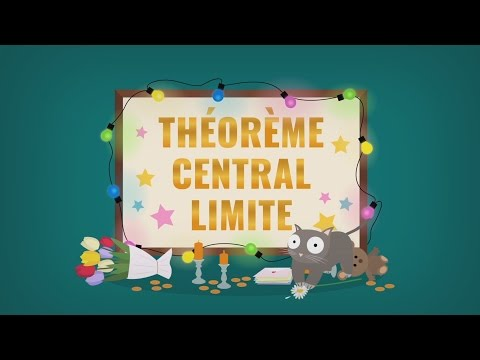

In [ ]:
#@title _

YouTubeVideo("4dhm2QAA2x4",  width=800, height=400)


---
### 1.2.1 Exercices ✏️:

1.   Est-ce que la distribution de la figure A est normale? Essayez d'imaginer un phénomène qui pourrait avoir cette distribution.

2. Est-ce que la distribution de l'échantillon (figure 1B) peut avoir une distribution normale si vous modifiez les paramètres?

3. Quels paramètres permettent d'obtenir une distribution d'échantillonnage de la moyenne normale (figure 1C)?
---

**n**: Taille de l'échantillon aléatoire

**N_échantillons**: Nombre d'échantillons aléatoires

**ic**: Taille de l'intervalle de confiance

<details>
<summary><font color="red"><b>Solutions<b></font> </summary>
  
ex1. Non, elle est exponetielle. Plusieurs variables se distribuent de cette façon. Par exemple, le temps parssé au téléphone par un opérateur dans un centre d'appel. La plupart des appels seront courts mais certains seront très long.

ex2. Non, la distribution de l'échantillon aléatoire reflètera toujours la distribution de la population.

ex3. Plusieurs échantillons (**N_échantillons**) de grande taille (**n**).

</details>


In [ ]:
#@title _

def normal_dist_sample_clt(n=20, N_échantillons=500):
    mu = 0
    sigma = 10
    all_means, all_stds = [], []
    for i in range(N_échantillons):
    # Échantilloner un groupe de N à partir de la distribution 1 (mu = 0, var=1)
        groupe1 = stats.expon.rvs(loc=mu, scale=sigma, size=n)
        all_means += [np.mean(groupe1)]
        all_stds += [np.std(groupe1)]
    fig, axes= plt.subplots(1, 3, figsize=(18, 5), dpi=70)

    x = np.linspace(0, mu + 4*sigma, 1000)
    y1 = [stats.expon.pdf(x, mu, sigma)[np.argmin(np.abs(x - v))] for v in groupe1]
    axes[0].axvline(stats.expon.mean(mu, sigma), color='r', linestyle='--', label='Moyenne : ' + str(stats.expon.mean(mu, sigma)))
    axes[0].plot(x, stats.expon.pdf(x, mu, sigma))
    axes[0].set_title('A- Distribution exponentielle', fontsize=15)
    axes[0].scatter(groupe1, y1, label=('Dernier échantillon aléatoire (N=' +  str(n) + ')') , s=50, color='k')
    axes[0].set_ylabel('Densité', fontsize=15)
    axes[0].set_xlabel('Variable dépendante', fontsize=15)
    axes[0].tick_params(labelsize=15)
    axes[0].legend(fontsize=12)

    sns.histplot(groupe1, kde=False, edgecolor='k', ax=axes[1])
    axes[1].axvline(np.mean(groupe1), linestyle='--', color='r', label='Moyenne: (N=' + str(n) + '): ' + str(np.round(np.mean(groupe1), 2)))
    axes[1].set_title("B - Distribution du dernier échantillon aléatoire", fontsize=15)
    axes[1].set_ylabel('Fréquence', fontsize=15)
    axes[1].set_xlabel('Variable dépendante', fontsize=15)

    axes[1].legend(fontsize=12)
    axes[1].tick_params(labelsize=15)


    sns.histplot(all_means, kde=False, edgecolor='k', ax=axes[2])
    axes[2].axvline(np.mean(all_means), linestyle='--', color='r', label='Moyenne (N=' + str(len(all_means)) + '): ' + str(np.round(np.mean(all_means), 2)))
    axes[2].axvline(np.mean(all_means)- np.std(all_means), linestyle='--', color='g', label='Écart-type: ' + str(np.round(np.std(all_means), 2)))
    axes[2].axvline(np.mean(all_means) + np.std(all_means), linestyle='--', color='g')
    axes[2].set_title("C - Distribution d'échantillonnage de la moyenne", fontsize=15)
    axes[2].set_ylabel('Fréquence', fontsize=15)
    axes[2].set_xlabel('Variable dépendante', fontsize=15)
    axes[2].legend(fontsize=12)
    axes[2].tick_params(labelsize=15)


    plt.show()


interactive_plot = interact_manual(normal_dist_sample_clt, n=(1, 200), N_échantillons=(1,5000))
interactive_plot.widget.children[2].description = 'Exécuter!'


interactive(children=(IntSlider(value=20, description='n', max=200, min=1), IntSlider(value=500, description='…

## 1.3 Distribution du t de Student

En pratique, nous ne faisons pas un échantillonnage répété pour faire une inférence et nous connaissons rarement les paramètres de la population. Nous prenons un seul échantillon de taille $n$ pour estimer la moyenne de la population.

Ainsi, nous ne connaissons pas la distribution d'échantillonnage de la moyenne. Il s'agit alors d'une distribution théorique puisqu'elle n'est pas observée.

De plus, puisque nous ne connaissons pas les paramètres de la population $\mu$ et $\sigma$, nous ne pouvons pas directement calculer $\mu_{\bar{X}} = \mu$ et $\sigma_{\bar{X}} = \frac{\sigma}{\sqrt{n}}$.


Nous devons donc estimer les caractéristiques de la distribution d'échantillonnage en utilisant la moyenne et l'écart type d'un seul échantillon.

Ainsi, $\mu_{\bar{X}} \approx \bar{X}$ et $\sigma_{\bar{X}} \approx \frac{S}{\sqrt{n}}$.

Toutefois, puisque nous utilisons l'écart-type de l'échantillon plutôt que celui de la population, nous ajoutons de l'incertitude à notre processus d'évaluation. Une façon de réduire cette incertitude est d'augmenter la taille de l'échantillon pour que $S$ deviennent une meilleure estimation de $\sigma$. Néanmoins, cette incertitude doit tout de même être prise en compte dans notre estimation.

**Ainsi, lorsque l'écart-type de la population est estimé à partir de l'écart-type de l'échantillon, nous ne pouvons utiliser directement la distribution normale. Nous devons utiliser la distribution du t de Student, dont la forme varie en fonction de la précision de notre estimation de $\sigma$. Avec l'augmentation de la taille d'échantillon (donc de la précision de notre estimation), la distribution t tend vers une distribution normale.**

Lorsque nous estimons un paramètre à partir d'un échantillon, nous estimons une quantité fixe. Ainsi, toutes les observations de notre échantillon ne sont pas libres de prendre n'importe quelle valeur. Par exemple, lorsque nous estimons une moyenne avec 10 observations, la dernière observation doit nous permettre d'arriver à la moyenne. Il y a donc une perte d'information lorsque nous estimons un paramètre à partir de l'échantillon que nous quantifions à l'aide des degrés de liberté, c'est-à-dire le nombre d'observations moins le nombre de paramètres estimés. Ici, nous avons déjà estimé $\mu$ à l'aide de l'échantillon et notre distribution t aura donc $n-1$ degrés de liberté.

La cellule ci-dessous permet de constater l'effet de la taille de l'échantillon sur la distribution t.


---
### 1.3.1 Exercices ✏️:

1.  Avec un **n** = 5 si on utilise les valeurs t et Z pour caculer des intervalles de confiance de 0.95, quel intervalle sera plus grand?

2. Que pourriez vous faire pour obtenir des intervalles presque identique avec les valeurs t et Z?
---

**n**: Taille de l'échantillon aléatoire

<details>
<summary><font color="red"><b>Solutions<b></font> </summary>
  
ex1. L'intervalle avec t sera plus grand car IC = +/- t ou z * ES et t est plus grand.

ex2. Augmenter la taille d'échantillon (e.g. **n** = 5000). Dans ce cas t aura presque la même valeur que Z.

</details>





In [ ]:
#@title _

def normal_dist_sample_t(n=3):
    mu = 0
    sigma = 1


    fig, axes= plt.subplots(1, 2, figsize=(15, 5), dpi=70)
    x = np.linspace(mu - 5*sigma, mu + 5*sigma, 1000)
    axes[0].plot(x, stats.norm.pdf(x, mu, sigma), label='Distribution normale')
    axes[0].plot(x, stats.t.pdf(x, n-1), label='Distribution t avec '+ str(n-1) +'\ndegrés de liberté')

    axes[0].set_title('A - Distribution normale et distribution t', fontsize=15)
    axes[0].set_ylabel('Densité', fontsize=15)
    axes[0].set_xlabel('Écart-type (t ou Z)', fontsize=15)
    axes[0].set_xlim(-4*sigma, 4*sigma)
    axes[0].tick_params(labelsize=15)

    axes[1].axis('off')
    axes[1].text(s='$Z_{0.025} = $' + '1.960000000', x=0.05, y=0.7, fontsize=20)
    axes[1].text(s='$t('+ str(n-1) + ')_{0.025} = $' + str(np.round(np.abs(stats.t.ppf((1-0.95)/2, df=n-1)), 8)), x=0.05, y=0.5, fontsize=20)
    axes[0].legend(fontsize=12)



    plt.show()


interactive_plot = interact_manual(normal_dist_sample_t, n=(2, 5000))
interactive_plot.widget.children[1].description = 'Exécuter!'

interactive(children=(IntSlider(value=3, description='n', max=5000, min=2), Button(description='Run Interact',…

## 1.4 Test d'hypothèse nulle

Lors d'une expérience, notre inférence porte généralement sur plus d'une population. **En fait, on tente de savoir si les unités expérimentales proviennent de populations avec la même moyenne (la manipulation n'a aucun effet) ou de populations avec des moyennes différentes (la manipulation a un effet).**

L'hypothèse selon laquelle notre manipulation n'a aucun effet sur la variable dépendante se nomme l'hypothèse nulle ou $H_0$. Cette hypothèse stipule que la moyenne des populations ($\mu$) dont proviennent les groupes expérimentaux sont identiques:

$\mu_{A} = \mu_{B}$ ou $\mu_{A} - \mu_{B} = 0$

L'hypothèses alternative stipule une différence entre ces moyennes. Cette hypothèse peut être directionnelle ou non:

$\mu_A \neq \mu_B$ ou $\mu_A > \mu_B$ ou $\mu_A < \mu_B$.

Supposons que nous testons l'effet d'un médicament adminitstré à des nouveaux nés qui prétend augmenter la taille des personnes à l'âge adulte. Nous assignons aléatoirement des nouveaux nés de la population québécoise à un traitement avec ce médicament ou à un traitement placebo (pillule inerte). Les distributions ci-dessous illustrent les effets possibles du traitement sur la taile moyenne à l'âge adulte.

Ainsi, si le traitement est efficace, nous devrions observer des populations distinctes suite au traitement. Au contraire, si notre traitement n'a aucun effet (effet == 0 dans la figure ci-dessous), la population du groupe traitement devrait avoir la même moyenne que la population du groupe placebo




---
### 1.4.1 Exercices ✏️:

1.  Dans la figure ci-dessous, comment interprèterions nous les résultats de l'expérience pour un **effet** = 0?

2.  Comment interprèterions nous les résultats de l'expérience pour un **effet** = -10?

---



<details>
<summary><font color="red"><b>Solutions<b></font> </summary>
  
ex1. Le traitement n'a aucun effet comparativement au placebo.

ex2. Le traitement a l'effet contraire de celui escompté (réduction de la taille).





</details>

In [ ]:
#@title _

def normal_dist_two_pop(effet=10):
    mu = 170
    mu2 = 170 + effet
    sigma = 20
    ci_z = np.abs(stats.norm.ppf((1-0.9999)/2))

    fig, axes= plt.subplots(1, 1, figsize=(8, 6), dpi=70)

    x = np.linspace(mu - 6*sigma, mu + 6*sigma, 1000)

    axes.plot(x, stats.norm.pdf(x, mu, sigma), color='b')
    axes.set_title('A - Distribution des populations\ndes groupes expérimentaux', fontsize=17)
    axes.set_ylabel('Densité', fontsize=17)
    axes.set_xlabel('Z', fontsize=17)
    axes.tick_params(labelsize=15)
    xsfill = np.arange(mu-sigma*ci_z, mu+sigma*ci_z, 0.01)
    axes.fill_between(xsfill,stats.norm.pdf(xsfill, mu, sigma),color='b', alpha=0.2)



    axes.plot(x, stats.norm.pdf(x, mu2, sigma), color='r')
    axes.set_ylabel('Densité', fontsize=17)
    axes.set_xlabel('Taille (cm)', fontsize=17)
    axes.set_xlim(mu2 - 6*sigma, mu2+6*sigma)
    axes.tick_params(labelsize=15)
    xsfill = np.arange(mu2-sigma*ci_z, mu2+sigma*ci_z, 0.01)
    axes.fill_between(xsfill,stats.norm.pdf(xsfill, mu2, sigma),color='r', alpha=0.2)
    axes.axvline(mu2, linestyle='--', color='r', label='$\mu_{traitement}$')
    axes.axvline(mu, linestyle='--', color='b', label='$\mu_{placebo}$')

    axes.legend(fontsize=14)


    plt.show()


interactive_plot = interact_manual(normal_dist_two_pop, effet=(-40, 40))
interactive_plot.widget.children[1].description = 'Exécuter!'


interactive(children=(IntSlider(value=10, description='effet', max=40, min=-40), Button(description='Run Inter…

Nous désirons donc effectuer une inférence sur les moyennes de chaque population et leur différence. Toutefois, nous sommes encore confrontés au fait que ces moyennes sont des paramètres inconnus que nous devons estimer à partir d'échantillons aléatoires.

Ci-dessous, nous pouvons voir la différence des moyennes de deux échantillons aléatoires soumis au traitement actif ou au traitement placebo.

---

### 1.4.2 Exercices ✏️:

1.   Avec un effet de 0 (le médicament n'a aucun effet), utilisez le *Exécuter!*  pour collecter plusieurs échantillons de petite taille (n = 10). Est-ce que la différence des moyennes des échantillons représente bien l'absence de différence?

2.  Refaites le même exercice avec un grand échantillon (n = 1000). Est-ce que la différence des moyennes des échantillons représente bien l'absence de différence?

---

**n**: Taille des échantillons pour chacun des groupe ($n = n_1 = n_2$).

**effet**: Différence des populations due au traitement.

<details>
<summary><font color="red"><b>Solutions<b></font> </summary>
  
ex1. Non, les moyennes des deux groupes sera souvent différente de plusieurs cm (parfois en faveur d'un group et parfois de l'autre) car notre estimation des paramètres est imprécise.

ex2. Oui, la différence des moyennes entre les groupes sera souvent proche de 0 car nous estimons de façon plus précise les paramètres.

</details>

In [ ]:
#@title _

def normal_dist_two_pop2(n=20, effet=10):
    mu = 170
    mu2 = 170 + effet
    sigma = 20
    ci_z = np.abs(stats.norm.ppf((1-0.9999)/2))

    groupe1 = np.random.normal(loc=mu, scale=sigma, size=n)
    groupe2 = np.random.normal(loc=mu2, scale=sigma, size=n)

    fig, axes= plt.subplots(1, 3, figsize=(18, 6), dpi=70)

    x = np.linspace(mu - 6*sigma, mu + 6*sigma, 1000)
    # axes[0].axvline(mu, color='r', linestyle='--', label='Moyenne : ' + str(np.round(mu)))
    # axes[0].axvline(mu- sigma, linestyle='--', color='g', label='Écart-type: ' + str(sigma))
    # axes[0].axvline(mu + sigma, linestyle='--', color='g')
    axes[0].plot(x, stats.norm.pdf(x, mu, sigma), color='b')
    axes[0].set_title('A - Distribution des populations\ndes groupes expérimentaux', fontsize=15)
    axes[0].set_ylabel('Densité', fontsize=15)
    axes[0].set_xlabel('Z', fontsize=15)
    axes[0].set_xlim(mu - 3*sigma, mu+3*sigma)
    axes[0].tick_params(labelsize=15)
    xsfill = np.arange(mu-sigma*ci_z, mu+sigma*ci_z, 0.01)
    axes[0].fill_between(xsfill,stats.norm.pdf(xsfill, mu, sigma),color='b', alpha=0.3)
    y1 = [stats.norm.pdf(x, mu, sigma)[np.argmin(np.abs(x - v))] for v in groupe1]
    axes[0].scatter(groupe1, y1, label='Échantillon placebo', s=50, color='b')
    y2 = [stats.norm.pdf(x, mu2, sigma)[np.argmin(np.abs(x - v))] for v in groupe2]
    axes[0].scatter(groupe2, y2, label='Échantillon traitement', s=50, color='r')


    axes[0].plot(x, stats.norm.pdf(x, mu2, sigma), color='r')
    axes[0].set_ylabel('Densité', fontsize=15)
    axes[0].set_xlabel('Taille (cm)', fontsize=15)
    axes[0].set_xlim(mu2 - 3*sigma, mu2+3*sigma)
    axes[0].tick_params(labelsize=15)
    xsfill = np.arange(mu2-sigma*ci_z, mu2+sigma*ci_z, 0.01)
    axes[0].fill_between(xsfill,stats.norm.pdf(xsfill, mu2, sigma),color='r', alpha=0.3)
    axes[0].axvline(mu2, linestyle='--', color='r', label='$\mu_{traitement}$')
    axes[0].axvline(mu, linestyle='--', color='b', label='$\mu_{placebo}$')

    axes[0].legend(fontsize=12)

    sns.histplot(groupe1, kde=False, edgecolor='k', color='b', ax=axes[1], alpha=0.3)
    sns.histplot(groupe2, kde=False, edgecolor='k', color='r', ax=axes[1], alpha=0.3)

    axes[1].axvline(np.mean(groupe2), linestyle='--', color='r', label='$\\bar{X}_{Tr}$ = ' + str(np.round(np.mean(groupe2), 2)) + ', $S=$' + str(np.round(np.std(groupe2), 2)))
    axes[1].axvline(np.mean(groupe1), linestyle='--', color='b', label='$\\bar{X}_{Pl}$ = ' + str(np.round(np.mean(groupe1), 2)) + ', $S=$' + str(np.round(np.std(groupe1), 2)))
    axes[1].axvline(np.mean(groupe1), linestyle='--', color='b', label='$\\bar{X}_{Tr}-\\bar{X}_{Pl}$ = ' + str(np.round(np.mean(groupe2)-np.mean(groupe1), 2)), alpha=0)

    axes[1].set_title("B - Distribution des\nderniers échantillons aléatoires", fontsize=15)
    axes[1].set_ylabel('Fréquence', fontsize=15)
    axes[1].set_xlabel('Taille (cm)', fontsize=15)
    axes[1].set_xlim(mu2 - 3*sigma, mu2+3*sigma)

    axes[1].legend(fontsize=15)
    axes[1].tick_params(labelsize=15)

    frame = pd.DataFrame({'values': list(groupe1) + list(groupe2), 'group': ['$X_{pl}$']*len(groupe1) + ['$X_{tr}$']*len(groupe2)})
    sns.boxplot(x=frame['group'], y=frame['values'], ax=axes[2], palette=['b', 'r'], boxprops=dict(alpha=.3))
    sns.stripplot(x=frame['group'], hue=frame['group'], y=frame['values'], ax=axes[2], palette=['b', 'r'], alpha=0.3, edgecolor='k', size=10, label=['A', 'B'])
    axes[2].set_title("C - Distribution et moyenne des\nderniers échantillons aléatoires", fontsize=15)
    axes[2].set_ylabel('Taille (cm)', fontsize=15)
    axes[2].set_xlabel('Groupes', fontsize=15)

    axes[2].tick_params(labelsize=15)
    handles, _ = axes[2].get_legend_handles_labels()          # Get the artists.
    axes[2].legend(handles, ["Placebo", "Traitement"], loc="best", fontsize=15) # Associate manually the artists to a label.


    plt.show()


interactive_plot = interact_manual(normal_dist_two_pop2, n=(2, 5000), effet=(-10, 10), nouveau=(0,1))
interactive_plot.widget.children[2].description = 'Exécuter!'


interactive(children=(IntSlider(value=20, description='n', max=5000, min=2), IntSlider(value=10, description='…

## 1.5 Intervalle de confiance autour d'un effet et valeur p

Nous constatons donc que même si le traitement n'a aucun effet, il est possible d'observer une différence entre les moyennes des groupes étant donné le caractère aléatoire de l'échantillonnage. Il est donc nécessaire de départager si notre effet observé est véritable ou dû au hasard.

Pour se faire, en suivant l'approche fréquentiste, nous pouvons imaginer répéter cette expérience un grand nombre de fois.

Ainsi, si nous répètons cette expérience plusieurs fois nous pouvons utiliser la distribution d'échantillonnage de la différence entre les moyennes pour:

1. Comme précédemment, calculer **l'intervalle de confiance** autour de la différence des moyennes et vérifier si nous pouvons conclure que les deux échantillons proviennent de populations différentes en tenant compte de la précision de notre estimation.

et/ou

2. Calculer la **probabilité au long cours d'observer une différence $d$ si notre hypothèse nulle est vraie**. Dans un monde ou l'hypothèse nulle est vraie, toute différence entre nos échantillons est due au hasard et nous devrions rarement observer de grandes différences entre les échantillons, particulièrement lorsque la taille d'échantillon est grande.

**Ces deux approches sont équivalentes.**

La figure ci-dessous montre la distribution d'échantillonnage de la différence entre les moyennes de nos deux traitements.

En utilisant les notions vues précédemment, nous pouvons calculer l'intervalle de confiance pour la différence des moyennes en utilisant la distribution t correspondante:

Puisque nous utilisons la différence entre deux moyennes, nous devons utiliser l'erreur standard de cette différence. Si les écart-types sont similaires dans chacun des groupes, nous pouvons utiliser l'écart-type combiné :

$S_{combiné} = \sqrt{\frac{(n_1-1)S_1^2 + (n_2-1)S_2^2}{n_1+n_2-2}}$

Anisi, l'erreur standard de la distribution d'échantillonnage calculée à a partir de l'écart-type combiné sera:

$ES_{\bar{X_1}-\bar{X_2}}  = S_{combiné}*\sqrt{1/n1 + 1/n2} $

Puisque nous devons calculer deux moyennes pour obtenir ces statistiques, nous perdons 2 degrés de liberté. Nous devrons donc utiliser la distribution t avec $n_1 + n_2-2$ degrés de liberté.

L'intervalle de confiance de 0.95 autour de la différence entre les moyenne est donc donné par:

$IC_{0.95} = d \pm t_{\alpha/2}*ES_{\bar{X_1}-\bar{X_2}}$

Où $d$ est la différence observée entre les moyennes $\bar{X_1}$ et $\bar{X_2}$ des échantillons \, $t(n-2)$ est la valeur t critique pour le seuil alpha choisi et une distribution t avec n-2 degrés de liberté et $ES_{\bar{X_1}-\bar{X_2}}$ l'erreur standard de la différence entre les moyennes.

Si notre intervalle de confiance inclut 0 (absence d'effet), nous ne pouvons rejeter l'hypothèse nulle. Toutefois, si notre intervalle de confiance exclut 0, nous pouvons rejeter l'hypothèse nulle et conclure que notre traitement a un effet sur la variable dépendante. La précision de notre estimation de la taille de cet effet dépend de la taille d'échantillon.  





---



## 1.5.1 Exercices ✏️

1. Avec un intervalle de confiance de 95%, quel est l'effet de la taille des échantillons sur notre conclusion (rejeter ou non l'hypothèse nulle) lorsque l'hypothèse nulle est vraie (effet = 0)? Est-ce que nous rejeterons plus souvent l'hypothèse nulle avec un grand échantillon?

2. Avec un intervalle de confiance de 95%, quel est l'effet de la taille des échantillons sur notre conclusion (rejeter ou non l'hypothèse nulle) lorsque l'hypothèse nulle est fausse (effet $\ne$ 0)? Est-ce que nous rejeterons plus souvent l'hypothèse nulle avec un grand échantillon?


3. Avec un effet réel de 10 et un intervalle de confiance de 95%, quelles sont les valeurs plausibles de l'effet estimé pour des petits échantillons (n = 20) pour lequel nous avons rejeté l'hypothèse nulle? Quelles sont les valeurs plausibles pour des grands échantillons (n = 500)?


---
**n**: Taille des échantillons ($n = n_1 = n_2$).

**effet**: Différence réelle entre les populations en cm.

**N_échantillon**: Nombre de répétition de l'échantillonnage.

**ci**: Intervalle de confiance.


<details>
<summary><font color="red"><b>Solutions<b></font> </summary>
  
ex1. Non, peu importe la taille de l'échantillon, si l'hypothèse nulle est vraie, elle sera rejetée éronnément dans 1 - IC ou 1 - 0.95 ou 5% des cas.

ex2. Oui, lorsque l'hypothèse nulle est fausse, nous la rejeterons plus souvent avec de plus grands échantillons.

ex2. En observant les intervalles de confiance dans la figure D, on obserce que lorsque n = 20, des valeurs environ entre 1 et 30 peuvent être inclues dans l'intervalle de confiance ; lorsque n = 500 les valeurs plausibles sont plutôt entre 6 et 12.

</details>

In [ ]:
#@title _

def normal_dist_two_pop_ci_p(n=20, effet=0, N_echantillon=1000, ci=0.95):
    mu = 170
    mu2 = 170 + effet
    sigma = 20
    ci_z = np.abs(stats.norm.ppf((1-0.9999)/2))


    all_means, all_stds = [], []
    for i in range(N_echantillon):
    # Échantilloner un groupe de N à partir de la distribution 1 (mu = 0, var=1)
        groupe1 = np.random.normal(loc=mu, scale=sigma, size=n)
        groupe2 = np.random.normal(loc=mu2, scale=sigma, size=n)
        all_means += [np.mean(groupe2) - np.mean(groupe1)]
        s1 = np.std(groupe1)
        s2 = np.std(groupe2)
        pooled_standard_deviation = np.sqrt(((n-1)*s1**2 + (n-1)*s2**2) / (n + n-2))
        all_stds += [pooled_standard_deviation]

    fig, axes= plt.subplots(1, 4, figsize=(22, 6), dpi=70)

    x = np.linspace(mu - 6*sigma, mu + 6*sigma, 1000)
    # axes[0].axvline(mu, color='r', linestyle='--', label='Moyenne : ' + str(np.round(mu)))
    # axes[0].axvline(mu- sigma, linestyle='--', color='g', label='Écart-type: ' + str(sigma))
    # axes[0].axvline(mu + sigma, linestyle='--', color='g')
    axes[0].plot(x, stats.norm.pdf(x, mu, sigma), color='b')
    axes[0].set_title('A - Distribution des populations\ndes groupes expérimentaux', fontsize=15)
    axes[0].set_ylabel('Densité', fontsize=15)
    axes[0].set_xlabel('Z', fontsize=15)
    axes[0].set_xlim(mu - 3*sigma, mu+3*sigma)
    axes[0].tick_params(labelsize=15)
    xsfill = np.arange(mu-sigma*ci_z, mu+sigma*ci_z, 0.01)
    axes[0].fill_between(xsfill,stats.norm.pdf(xsfill, mu, sigma),color='b', alpha=0.3)
    y1 = [stats.norm.pdf(x, mu, sigma)[np.argmin(np.abs(x - v))] for v in groupe1]
    axes[0].scatter(groupe1, y1, label='Échantillon placebo', s=50, color='b')
    y2 = [stats.norm.pdf(x, mu2, sigma)[np.argmin(np.abs(x - v))] for v in groupe2]
    axes[0].scatter(groupe2, y2, label='Échantillon traitement', s=50, color='r')


    axes[0].plot(x, stats.norm.pdf(x, mu2, sigma), color='r')
    axes[0].set_ylabel('Densité', fontsize=15)
    axes[0].set_xlabel('Taille (cm)', fontsize=15)
    axes[0].set_xlim(mu2 - 3*sigma, mu2+3*sigma)
    axes[0].tick_params(labelsize=15)
    xsfill = np.arange(mu2-sigma*ci_z, mu2+sigma*ci_z, 0.01)
    axes[0].fill_between(xsfill,stats.norm.pdf(xsfill, mu2, sigma),color='r', alpha=0.3)
    axes[0].axvline(mu2, linestyle='--', color='r', label='$\mu_{traitement}$')
    axes[0].axvline(mu, linestyle='--', color='b', label='$\mu_{placebo}$')

    axes[0].legend(fontsize=12)

    sns.histplot(groupe1, kde=False, edgecolor='k', color='b', ax=axes[1], alpha=0.3)
    sns.histplot(groupe2, kde=False, edgecolor='k', color='r', ax=axes[1], alpha=0.3)

    axes[1].axvline(np.mean(groupe2), linestyle='--', color='r', label='$\\bar{X}_{Tr}$ = ' + str(np.round(np.mean(groupe2), 2)) + ', $S=$' + str(np.round(np.std(groupe2), 2)))
    axes[1].axvline(np.mean(groupe1), linestyle='--', color='b', label='$\\bar{X}_{Pl}$ = ' + str(np.round(np.mean(groupe1), 2)) + ', $S=$' + str(np.round(np.std(groupe1), 2)))
    axes[1].axvline(np.mean(groupe1), linestyle='--', color='b', label='$\\bar{X}_{Tr}-\\bar{X}_{Pl}$ = ' + str(np.round(np.mean(groupe2)-np.mean(groupe1), 2)), alpha=0)

    axes[1].set_title("B - Distribution des\nderniers échantillons aléatoires", fontsize=15)
    axes[1].set_ylabel('Fréquence', fontsize=15)
    axes[1].set_xlabel('Taille (cm)', fontsize=15)
    axes[1].set_xlim(mu2 - 3*sigma, mu2+3*sigma)

    axes[1].legend(fontsize=12)
    axes[1].tick_params(labelsize=15)

    sns.histplot(all_means, kde=False, edgecolor='k', ax=axes[2], color='purple', stat='density', alpha=0.3)
    axes[2].axvline(np.mean(all_means), linestyle='--', color='r', label='Moyenne (N=' + str(len(all_means)) + '): ' + str(np.round(np.mean(all_means), 2)))

    axes[2].axvline(np.mean(all_means)- np.std(all_means), linestyle='--', color='g', label='Écart-type: ' + str(np.round(np.std(all_means), 2)))
    axes[2].axvline(np.mean(all_means) + np.std(all_means), linestyle='--', color='g')
    axes[2].set_xlim(np.min(all_means), np.max(all_means))
    axes[2].set_title("C - Distribution d'échantillonnage\nde $X_{tr}$ - $X_{pl}$", fontsize=15)
    axes[2].set_ylabel('Densité', fontsize=15)
    axes[2].set_xlabel('Effet observé ($X_{tr}$ - $X_{pl}$)', fontsize=15)
    axes[2].tick_params(labelsize=15)
    axes[2].legend(fontsize=12)

    # Intervalle de confiance de 95% des 100 derniers échantillons


    # Probabilité d'observer ce résultat dans la distribution d'échantillonnage.
    ci_t = np.abs(stats.t.ppf((1-ci)/2, n-2))

    hit, miss = 0, 0
    for m, s, idx in zip(all_means[0:100], all_stds[0:100], np.arange(len(all_means[0:100]))):
        serror = s*np.sqrt(1/n + 1/n)
        if effet == 0:
            if m-ci_t*serror < effet and m+ci_t*serror > effet:
                col = 'g'
                hit += 1
                label="IC inclut effet réel"

            else:
                col = 'r'
                label="IC n'inclut pas effet réel"
                miss += 1
        else:
            if m-ci_t*serror < 0 and m+ci_t*serror > 0:
                col = 'r'
                miss += 1
                label="IC inclut 0"

            else:
                col = 'g'
                label="IC n'inclut pas 0"
                hit += 1


        if (hit == 1 and col == 'g') or (miss == 1 and col=='r'):
            axes[3].plot([m-ci_t*serror, m+ci_t*serror], [idx, idx], color=col, label=label)
        else:
            axes[3].plot([m-ci_t*serror, m+ci_t*serror], [idx, idx], color=col)

        axes[3].scatter(m, idx, color=col)

    if np.min(all_means[0:100]-2*serror) < 0:
        min = np.min(all_means[0:100]-2*serror)
    else:
        min = -0.5
    axes[3].set_xlim(min, np.max(all_means[0:100]+2*serror))
    axes[3].set_title("D - Différence de moyenne et intervalles de confiance\ndes 100 premiers échantillonnage", fontsize=15)
    axes[3].set_ylabel('# Échantillon', fontsize=15)
    axes[3].axvline(effet, linestyle='--', color='k', label='Effet réel')
    axes[3].axvline(0, linestyle='--', color='gray', label="Absence d'effet")

    axes[3].set_xlabel('Effet observé ($X_{tr}$ - $X_{pl}$)', fontsize=15)
    axes[3].legend(fontsize=10)
    axes[3].tick_params(labelsize=20)
    plt.subplots_adjust(hspace=0.5)
    plt.show()


interactive_plot = interact_manual(normal_dist_two_pop_ci_p, n=(5, 500), effet=(-10, 10), N_echantillon=(1, 5000), ci=(0.1, 0.99))
interactive_plot.widget.children[4].description = 'Exécuter!'


interactive(children=(IntSlider(value=20, description='n', max=500, min=5), IntSlider(value=0, description='ef…

Finalement, une approche identique à calculer l'intervalle de confiance autour de la différence des moyennes et qui est souvent utilsée consiste à calculer la valeur $p$, soit la probabilité d'observer la différence obtenue ou une différence plus extrême si l'hypothèse nulle est vraie.

En utilisant la distribution d'échantillonnage, nous pouvons calculer la probabilité pour une seule expérience d'observer une valeur $d$.

La **figure D** ci-dessous montre la distribution d'échantillonnage des différences de moyenne si l'hypothèse nulle est vraie. On peut obtenir la probabilité d'observer une différence $d$ ou plus extrême que $d$ en comparant la valeur obtenue à cette distribution d'échantillonnage, ou la proportion de différences $d$ égales ou plus grandes à celle obtenue.

Si cette proportion est faible, on peut conclure que cette différence n'est probablement pas due à la chance et on peut rejeter l'hypothèse nulle.

Si cette proportion est élevée, le résultat obtenu est fréquent si l'hypothèse nulle est vraie est toute différence est probablement due à la chance plutôt qu'au traitement. Nous ne pouvons donc rejeter l'hypothèse nulle.


Au prochain cours, nous verrons comment nous pouvons rapidement obtenir la valeur $p$ pour une différence entre deux moyennes à l'aide du test-t pour échantillons indépendants.

---
## 1.5.2 Exercices ✏️

1. Quelle est la forme de la distribution des valeurs $p$ lorsque l'hypothèse nulle est vraie (effet == 0)?

2. Quelle est la forme de la distribution des valeurs $p$ lorsque l'hypothèse nulle est fausse?

3. Si l'hypothèse nulle est vraie, quelle est la probabilité d'obtenir une valeur p < 0.10?

4. Quel est l'effet de la taille des échantillons sur la distribution des valeurs $p$ a) lorsque l'hypothèse nulle est vraie (effet == 0)? b) lorsque l'hypothèse nulle est fausse (effet $\ne$ 0)

4. Quel est l'effet de la taille de l'effet sur la distribution des valeurs $p$?

**n**: Taille des échantillons ($n = n_1 = n_2$).

**effet** Différence entre les populations en cm.

**N_échantillon**: Nombre de répétition de l'échantillonnage.

**alpha**: Valeur $p$ utilisée pour rejeter l'hyopthèse nulle si $p < \alpha$.


<details>
<summary><font color="red"><b>Solutions<b></font> </summary>
  
ex1. La distribution des valeurs p sous l'hypothèse nulle est uniforme, c'est-à-dire que toutes les valeurs ont la même probabilité d'être obtenue. On obtiendra donc une valeur p < 0.05 dans 5% des cas. Dans la figure, la distribution est approximativement uniforme puisqu'il s'agit d'une simulation.


ex2. La distribution est exponentielle. Les petites valeurs p sont sur-représentées et donc il y a une plus grande probabilité d'effectivement rejeter l'hypothèse nulle.

ex3. 10% (puisque la distribution sera uniforme)

ex4. Vraie: Aucun effet. Fausse: Plus de petites valeurs p sont observées et donc la distribution transitionne d'une distribution uniforme vers une distribution exponentielle avec l'augmentation de la taille d'échantillon.

</details>

In [ ]:
#@title _

def normal_dist_two_pop_ci_p2(n=20, effet=0, N_echantillon=2000, alpha=0.05):
    crit_p = alpha
    mu = 170
    mu2 = 170 + effet
    sigma = 20
    ci_z = np.abs(stats.norm.ppf((1-0.9999)/2))


    all_means, all_stds, all_means_null = [], [], []
    for i in range(N_echantillon):
    # Échantilloner un groupe de N à partir de la distribution 1 (mu = 0, var=1)
    # Échantilloner un groupe de N à partir de la distribution 1 (mu = 0, var=1)
        groupe1 = np.random.normal(loc=mu, scale=sigma, size=n)
        groupe2 = np.random.normal(loc=mu2, scale=sigma, size=n)
        group_null = np.random.normal(loc=mu, scale=sigma, size=n)
        all_means += [np.mean(groupe2) - np.mean(groupe1)]
        all_means_null += [np.mean(group_null) - np.mean(groupe1)]
        s1 = np.std(groupe1)
        s2 = np.std(groupe2)
        pooled_standard_deviation = np.sqrt(((n-1)*s1**2 + (n-1)*s2**2) / (n + n-2))
        all_stds += [pooled_standard_deviation]


    fig, axes= plt.subplots(1, 4, figsize=(22, 6), dpi=70)

    x = np.linspace(mu - 6*sigma, mu + 6*sigma, 1000)
    # axes[0].axvline(mu, color='r', linestyle='--', label='Moyenne : ' + str(np.round(mu)))
    # axes[0].axvline(mu- sigma, linestyle='--', color='g', label='Écart-type: ' + str(sigma))
    # axes[0].axvline(mu + sigma, linestyle='--', color='g')
    axes[0].plot(x, stats.norm.pdf(x, mu, sigma), color='b')
    axes[0].set_title('A - Distribution des populations\ndes groupes expérimentaux', fontsize=15)
    axes[0].set_ylabel('Densité', fontsize=15)
    axes[0].set_xlabel('Z', fontsize=15)
    axes[0].set_xlim(mu - 3*sigma, mu+3*sigma)
    axes[0].tick_params(labelsize=15)
    xsfill = np.arange(mu-sigma*ci_z, mu+sigma*ci_z, 0.01)
    axes[0].fill_between(xsfill,stats.norm.pdf(xsfill, mu, sigma),color='b', alpha=0.3)
    y1 = [stats.norm.pdf(x, mu, sigma)[np.argmin(np.abs(x - v))] for v in groupe1]
    axes[0].scatter(groupe1, y1, label='Échantillon placebo', s=50, color='b')
    y2 = [stats.norm.pdf(x, mu2, sigma)[np.argmin(np.abs(x - v))] for v in groupe2]
    axes[0].scatter(groupe2, y2, label='Échantillon traitement', s=50, color='r')


    axes[0].plot(x, stats.norm.pdf(x, mu2, sigma), color='r')
    axes[0].set_ylabel('Densité', fontsize=15)
    axes[0].set_xlabel('Taille (cm)', fontsize=15)
    axes[0].set_xlim(mu2 - 3*sigma, mu2+3*sigma)
    axes[0].tick_params(labelsize=15)
    xsfill = np.arange(mu2-sigma*ci_z, mu2+sigma*ci_z, 0.01)
    axes[0].fill_between(xsfill,stats.norm.pdf(xsfill, mu2, sigma),color='r', alpha=0.3)
    axes[0].axvline(mu2, linestyle='--', color='r', label='$\mu_{traitement}$')
    axes[0].axvline(mu, linestyle='--', color='b', label='$\mu_{placebo}$')

    axes[0].legend(fontsize=12)

    sns.histplot(groupe1, kde=False, edgecolor='k', color='b', ax=axes[1], alpha=0.3)
    sns.histplot(groupe2, kde=False, edgecolor='k', color='r', ax=axes[1], alpha=0.3)

    axes[1].axvline(np.mean(groupe2), linestyle='--', color='r', label='$\\bar{X}_{Tr}$ = ' + str(np.round(np.mean(groupe2), 2)) + ', $S=$' + str(np.round(np.std(groupe2), 2)))
    axes[1].axvline(np.mean(groupe1), linestyle='--', color='b', label='$\\bar{X}_{Pl}$ = ' + str(np.round(np.mean(groupe1), 2)) + ', $S=$' + str(np.round(np.std(groupe1), 2)))
    axes[1].axvline(np.mean(groupe1), linestyle='--', color='b', label='$\\bar{X}_{Tr}-\\bar{X}_{Pl}$ = ' + str(np.round(np.mean(groupe2)-np.mean(groupe1), 2)), alpha=0)

    axes[1].set_title("B - Distribution des\nderniers échantillons aléatoires", fontsize=15)
    axes[1].set_ylabel('Fréquence', fontsize=15)
    axes[1].set_xlabel('Taille (cm)', fontsize=15)
    axes[1].set_xlim(mu2 - 3*sigma, mu2+3*sigma)

    axes[1].legend(fontsize=12)
    axes[1].tick_params(labelsize=15)

    sns.histplot(all_means_null, kde=False, edgecolor='k', ax=axes[2], color='purple', stat='density', alpha=0.3)

    lasteffect = all_means[-1]

    if lasteffect > 0:
        hits = np.where(lasteffect>= all_means_null, 1, 0)
    else:
        hits = np.where(lasteffect <= all_means_null, 1, 0)

    p = (1- ((np.sum(hits)/(len(all_means)+1))))*2
    if p < 0.001:
        p = '< 0.001'

    else:
        p = '= ' + str(round(p, 3))

    axes[2].axvline(lasteffect, linestyle='--', color='g', label='Effet dernier échantillonnage\n(valeur p bidirectionnelle ' + p + ')')

    num, bins, patches = axes[2].hist(all_means_null, 50)




    for c, p in zip(bins, patches):
        if lasteffect <= 0:
            if c <= lasteffect:
                plt.setp(p, 'facecolor', 'g')
        else:
            if c >= lasteffect:
                plt.setp(p, 'facecolor', 'g')

    if effet == 0:
        axes[2].set_xlim(np.min(all_means_null), np.max(all_means_null))
    else:
        if lasteffect < 0:
            axes[2].set_xlim(np.min(all_means_null)-(lasteffect+1), np.max(all_means_null))
        else:
            axes[2].set_xlim(np.min(all_means_null), np.max(all_means_null)+lasteffect+1)

    axes[2].set_title("C - Distribution d'échantillonnage\nde $X_{tr}$ - $X_{pl}$ **si l'hypothèse nulle est vraie**", fontsize=15)
    axes[2].set_ylabel('Fréquence', fontsize=15)
    axes[2].set_xlabel('Effet observé ($X_{tr}$ - $X_{pl}$)', fontsize=15)
    axes[2].tick_params(labelsize=15)
    axes[2].legend(fontsize=12)


    ps = []
    for i in all_means:
        if i > 0:
            hits = np.where(i >= all_means_null, 1, 0)
        else:
            hits = np.where(i <= all_means_null, 1, 0)

        ps.append((1- ((np.sum(hits)/(len(all_means)+1))))*2)



    num, bins, patches = axes[3].hist(ps, 20)

    count = 0
    for c, p in zip(bins, patches):
        if c <= crit_p:
                if count == 0:
                    plt.setp(p, 'facecolor', 'g', label='Valeurs p < ' + str(crit_p))
                    count += 1
                else:
                    plt.setp(p, 'facecolor', 'g')


    axes[3].legend(fontsize=12)

    axes[3].set_title("D - Distribution des valeurs p obtenues\npour chaque échantillonnage", fontsize=15)
    axes[3].set_ylabel('Fréquence', fontsize=15)
    axes[3].set_xlabel('Valeur $p$', fontsize=15)
    axes[3].tick_params(labelsize=15)


    plt.show()


interactive_plot = interact_manual(normal_dist_two_pop_ci_p2, n=(5, 500), effet=(-10, 10), N_echantillon=(1, 5000), alpha=(0.001, 0.99))
interactive_plot.widget.children[-2].description = 'Exécuter!'


interactive(children=(IntSlider(value=20, description='n', max=500, min=5), IntSlider(value=0, description='ef…



---





En fonction de la probabilité d'observer les résultats obtenus si l'hypothèse nulle est vraie, nous pouvons rejeter ou non l'hypothèse nulle.

Si nous rejetons l'hypothèse nulle alors qu'elle est vraie, nous ferons une erreur de type 1. La probabilité de faire une erreur de type 1 est le seuil $\alpha$ ou la taille de l'intervalle de confiance utilisé.

S'il existe un effet et que nous ne rejetons pas l'hypothèse nulle, nous ferons une erreur de type 2. La probabilité de faire une erreur de type 2 est donnée par ($\beta$), qui est l'inverse de la puissance statistique ($Puissance = 1 - \beta$).





**Même en l'absence d'erreur de type 1 ou type 2, nous pouvons faire des erreurs de type M et type S.**

L'erreur de type M est une erreur de magnitude, c'est-à-dire que nous surestimons la taille de l'effet réel.

L'erreur de type S est une erreur de signe, c'est-à-dire que nous concluons à un effet qui est dans la mauvaise direction (effet positif alors qu'il est négatif ou vice-versa).


</a> <img src="https://github.com/mpcoll/psy7000v2/blob/master/images/errortypes.png?raw=true" width="600">



---
## 1.5.3 Exercices ✏️

1. Si l'hypothèse nulle est vraie (effet = 0) est-ce qu'il est possible de faire une erreur de type M ou S?

2. Avec une petite taille d'échantillon (n = 5) et un petit effet (effet = 1), est-ce qu'il est possible de rejeter l'hypothèse nulle?

3. Avec une taille d'échantillon de (n = 20) et un  effet modeste (effet = 1.5), que peut-on conclure si l'hypothèse nulle est rejetée?


Paramètres:

**n**: Taille des échantillons ($n = n_1 = n_2$).

**effet** Différence entre les populations en cm.

**alpha**: Valeur $p$ utilisée pour rejeter l'hyopthèse nulle si $p < \alpha$.

<details>
<summary><font color="red"><b>Solutions<b></font> </summary>
  
ex1. Non, seule l'erreur de type 1 est possible. La probabilité de faire une erreur de type 1 dépend du seuil alpha.

ex2. Non, nous n'aurons jamais la précision nécessaire pour détecter la petite différence entre les groupes et toutes les décisions seront toujours des erreurs de type 2 puisque l'hypothèse nulle est fausse mais n'est pas rejetée.


ex3. Si l'hypothèse nulle est rejetée, la plupart des rejets seront des erreurs de type M ou S puisque la taille de l'effet observée est une surestimation de l'effet réel (type M) ou bien dans la mauvaise direction (type s).



</details>




In [ ]:
#@title _

def normal_dist_errors(n=20, effet=0, alpha=0.05):
    print('EN TRAVAIL...')
    crit_p = alpha
    mu = 170
    mu2 = 170 + effet
    sigma = 20
    ci_z = np.abs(stats.norm.ppf((1-0.9999)/2))

    all_means, all_stds, all_means_null = [], [], []
    for i in range(10000):
    # Échantilloner un groupe de N à partir de la distribution 1 (mu = 0, var=1)
    # Échantilloner un groupe de N à partir de la distribution 1 (mu = 0, var=1)
        groupe1 = np.random.normal(loc=mu, scale=sigma, size=n)
        groupe2 = np.random.normal(loc=mu2, scale=sigma, size=n)
        group_null = np.random.normal(loc=mu, scale=sigma, size=n)
        all_means += [np.mean(groupe2) - np.mean(groupe1)]
        all_means_null += [np.mean(group_null) - np.mean(groupe1)]
        s1 = np.std(groupe1)
        s2 = np.std(groupe2)
        pooled_standard_deviation = np.sqrt(((n-1)*s1**2 + (n-1)*s2**2) / (n + n-2))
        all_stds += [pooled_standard_deviation]


    fig, axes= plt.subplots(1, 2, figsize=(15, 5), dpi=70)

    x = np.linspace(mu - 8*sigma, mu + 8*sigma, 1000)


    lasteffect = all_means[-1]

    axes[0].axvline(effet, linestyle='--', color='g', label='Effet réel')
    axes[0].axvline(0, linestyle='--', color='gray', label='Aucun effet')

    axes[0].set_title("A - Distribution d'échantillonnage\nde $X_{tr}$ - $X_{pl}$ **si l'hypothèse nulle est vraie**", fontsize=15)
    axes[0].set_ylabel('Fréquence', fontsize=15)
    axes[0].set_xlabel('Effet observé ($X_{tr}$ - $X_{pl}$)', fontsize=15)
    axes[0].tick_params(labelsize=15)


    num, bins, patches = axes[0].hist(all_means_null, 100)

    ci_t = np.abs(stats.t.ppf((alpha)/2, n-2))
    serrors = np.std(all_means_null)

    if effet == 0:
        count = 0
        for c, p in zip(bins, patches):
            if c < -ci_t*serrors or c > ci_t*serrors:
                if count == 0:
                    plt.setp(p, 'facecolor', 'r', label='Erreur de type 1 pour ' + r'$\alpha = $' + str(alpha))
                    count = count + 1
                else:
                    plt.setp(p, 'facecolor', 'r')

    axes[0].legend(fontsize=12)


    axes[1].axvline(effet, linestyle='--', color='g', label='Effet réel')
    axes[1].axvline(0, linestyle='--', color='gray', label='Aucun effet')

    axes[1].set_title("B - Distribution d'échantillonnage\nde $X_{tr}$ - $X_{pl}$", fontsize=15)
    axes[1].set_ylabel('Fréquence', fontsize=15)
    axes[1].set_xlabel('Effet observé ($X_{tr}$ - $X_{pl}$)', fontsize=15)
    axes[1].tick_params(labelsize=15)


    num2, bins2, patches2 = axes[1].hist(all_means, 100)

    ci_t = np.abs(stats.t.ppf((alpha)/2, n-2))
    serrors = np.std(all_means_null)

    count, count2, count3, count4 = 0, 0, 0, 0

    if effet == 0:
        for c, p, c2, p2 in tqdm(zip(bins, patches, bins2, patches2)):
            if c < -ci_t*serrors or c > ci_t*serrors:
                if count == 0:
                    plt.setp(p, 'facecolor', 'r', label='Erreur de type 1 pour ' + r'$\alpha = $' + str(alpha))
                    plt.setp(p2, 'facecolor', 'r', label='Erreur de type 1 pour ' + r'$\alpha = $' + str(alpha))

                    count = count + 1
                else:
                    plt.setp(p, 'facecolor', 'r')
                    plt.setp(p2, 'facecolor', 'r')

    else:
        for c, p in zip(bins, patches):
            if c < -ci_t*serrors or c > ci_t*serrors:
                if count == 0:
                    plt.setp(p, 'facecolor', 'g', label='Zone de réjection bidirectionnelle ' + r'$\alpha = $' + str(alpha))
                    count = count + 1
                else:
                    plt.setp(p, 'facecolor', 'g')
        for c2, p2 in zip(bins2, patches2):
            if effet > 0:
                if c2 < 0:
                    if count2 == 0:
                        plt.setp(p2, 'facecolor', 'orange', label='Erreur de type S')
                        count2 += 1
                    else:
                        plt.setp(p2, 'facecolor', 'orange')
                if c2 >  effet+ci_t*serrors:
                    if count4 == 0:
                        plt.setp(p2, 'facecolor', 'purple', label='Erreur de type M')
                        count4 += 1
                    else:
                        plt.setp(p2, 'facecolor', 'purple')

            if effet < 0:
                if c2 > 0:
                    if count2 == 0:
                        plt.setp(p2, 'facecolor', 'orange', label='Erreur de type S')
                        count2 += 1

                    else:
                        plt.setp(p2, 'facecolor', 'orange')


            if c2-ci_t*serrors < 0 and c2+ci_t*serrors > 0:
                if count3 == 0:
                    plt.setp(p2, 'facecolor', 'r', label='Erreur de type 2 pour ' + r'$\alpha = $' + str(alpha))
                    count3 = count3 + 1
                else:
                    plt.setp(p2, 'facecolor', 'r')

            if c2-ci_t*serrors < effet and c2+ci_t*serrors > effet:
                pass
            else:
                if effet > 0 and c2 > 0 or effet < 0 and c2 < 0:
                    if count4 == 0:
                        plt.setp(p2, 'facecolor', 'purple', label='Erreur de type M')
                        count4 += 1
                    else:
                        plt.setp(p2, 'facecolor', 'purple')
    axes[1].legend(fontsize=12)
    axes[0].legend(fontsize=12)

    print('FINI...')

    plt.show()



interactive_plot = interact_manual(normal_dist_errors, n=(5, 5000), effet=(-10, 10, 0.1), alpha=(0.001, 0.99))
interactive_plot.widget.children[3].description = 'Exécuter!'



interactive(children=(IntSlider(value=20, description='n', max=5000, min=5), FloatSlider(value=0.0, descriptio…



---



## Fin du calepin 🎉